# Sumário

[Introdução](#1) <a id=180></a>
1. [Importação, Transformação e Limpeza de Dados](#2)
    - 1.1 [Configurações Gerais](#3)
    - 1.2 [Importar Dataframe](#4)
    - 1.3 [Entendendo os dados](#5)
2. [Análise Exploratória de Dados (EDA)](#6)
    - 2.1 [Análise Univariada](#7)
    - 2.2 [Análise Bivariada](#8)
3. [Pré-processamento de Dados](#11)
    - 3.1 [Conclusões da EDA](#12)
    - 3.2 [Instalando pacotes](#13)
    - 3.3 [Configurando Caracteristicas para o modelo](#14)
4. [Modelagem](#15)
    - 4.1 [Classificadores Lineares](#16)
    - 4.2 [Modelos de Arvore](#17)
    - 4.3 [Acurácia dos Modelos](#18)
5. [Implantação no Machine Learning Studio](19)
    - 5.1 [Diagrama do Pipeline](20)
    - 5.2 [Ajuste Fino](21)
    - 5.3 [Web Services](22)
6. [Conclusão](23)

### Introdução <a id=1></a>
[back to top](#18)

#### Entendendo o Dataframe

##### Objetivo
Identificar a probabilidade de ataques cardíacos usando Machine Learning, treinando um modelo para classificar pacientes com maior ou menor chance de sofrer um ataque cardíaco.

##### Colunas do DataFrame
- **age:** Idade do paciente.
- **sex:** Sexo do paciente.
- **cp:** Tipo de dor no peito:
  - 0: Angina típica.
  - 1: Angina atípica.
  - 2: Dor não anginosa.
  - 3: Assintomática.
- **trtbps:** Pressão arterial em repouso (em mm Hg).
- **chol:** Colesterol em mg/dl obtido via sensor BMI.
- **fbs:** Açúcar no sangue em jejum (> 120 mg/dl) (1 = verdadeiro; 0 = falso).
- **restecg:** Resultados eletrocardiográficos em repouso:
  - 0: Normal.
  - 1: Anormalidade de onda ST-T (inversões de onda T e/ou elevação ou depressão de > 0.05 mV).
  - 2: Mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes.
- **thalachh:** Frequência cardíaca máxima atingida.
- **oldpeak:** Pico anterior.
- **slp:** Inclinação.
- **caa:** Número de vasos principais.
- **thall:** Resultado do Teste de Estresse com Tálio (0-3).
- **exng:** Angina induzida por exercício (1 = sim; 0 = não).
- **output:** Variável alvo - 0 = Menor chance de ataque cardíaco, 1 = Maior chance de ataque cardíaco.

##### Ações
1. **Importação, Transformação e Limpeza de Dados:** Preparar os dados para análise, lidando com valores ausentes e possíveis inconsistências.
2. **Análise Exploratória de Dados (EDA):** Explorar e visualizar as características do conjunto de dados para identificar padrões e insights.
3. **Pré-processamento de dados:** Preparar os dados para serem utilizados nos modelos de machine learning.
4. **Modelagem** Desenvolver e treinar modelos de machine learning com o conjunto de dados preparado.
5. **Resultado** Obter o algoritmo ideal para o problema.


### 1. Importação, Transformação e Limpeza de Dados <a id=2></a>
[back to top](#180)

##### 1.1 Configurações Gerais <a id=3></a>

In [2]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ignorar 'Warnings'
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Importar o dataframe <a id=4></a>

In [3]:
nRowsRead = None # Para limitar o numero de linhas carregadas substitua 'None' pelo numero desejado.

df = pd.read_csv("../data/heart-dataset/heart.csv", delimiter=',', nrows=nRowsRead)
df.dataframeName = 'heart.csv'
nRow, nCol = df.shape
print(f"Existem {nRow} linhas e {nCol} colunas no dataframe")

Existem 303 linhas e 14 colunas no dataframe


#### 1.3 Entendendo os dados <a id=5></a>

In [4]:
# Inicio do Dataframe
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Final do Dataframe
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Informações sobre o Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Verificar valores faltantes
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# Verificar valores duplicados
df.duplicated().sum()

1

**Observações**
- Nenhum valor 'null' encontrado 
- Tipos de dados ja estão corretos
- Não há valores faltantes.
- Existe 1 valor duplicado.

In [9]:
# Separar colunas em Categóricas e Continuas
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("Colunas Categóricas : ", cat_cols)
print("Colunas Continuas : ", con_cols)
print("Target :  ", target_col)

Colunas Categóricas :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Colunas Continuas :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target :   ['output']


In [10]:
# Descrição dos Dados
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Observações**
- Média de idade: 54


### 2. Análise Exploratória de Dados (EDA) <a id=6></a>
[back to top](#180)

#### 2.1 Análise Univariada <a id=7></a>

##### 2.1.1 Gráfico de contagem de recursos categóricos

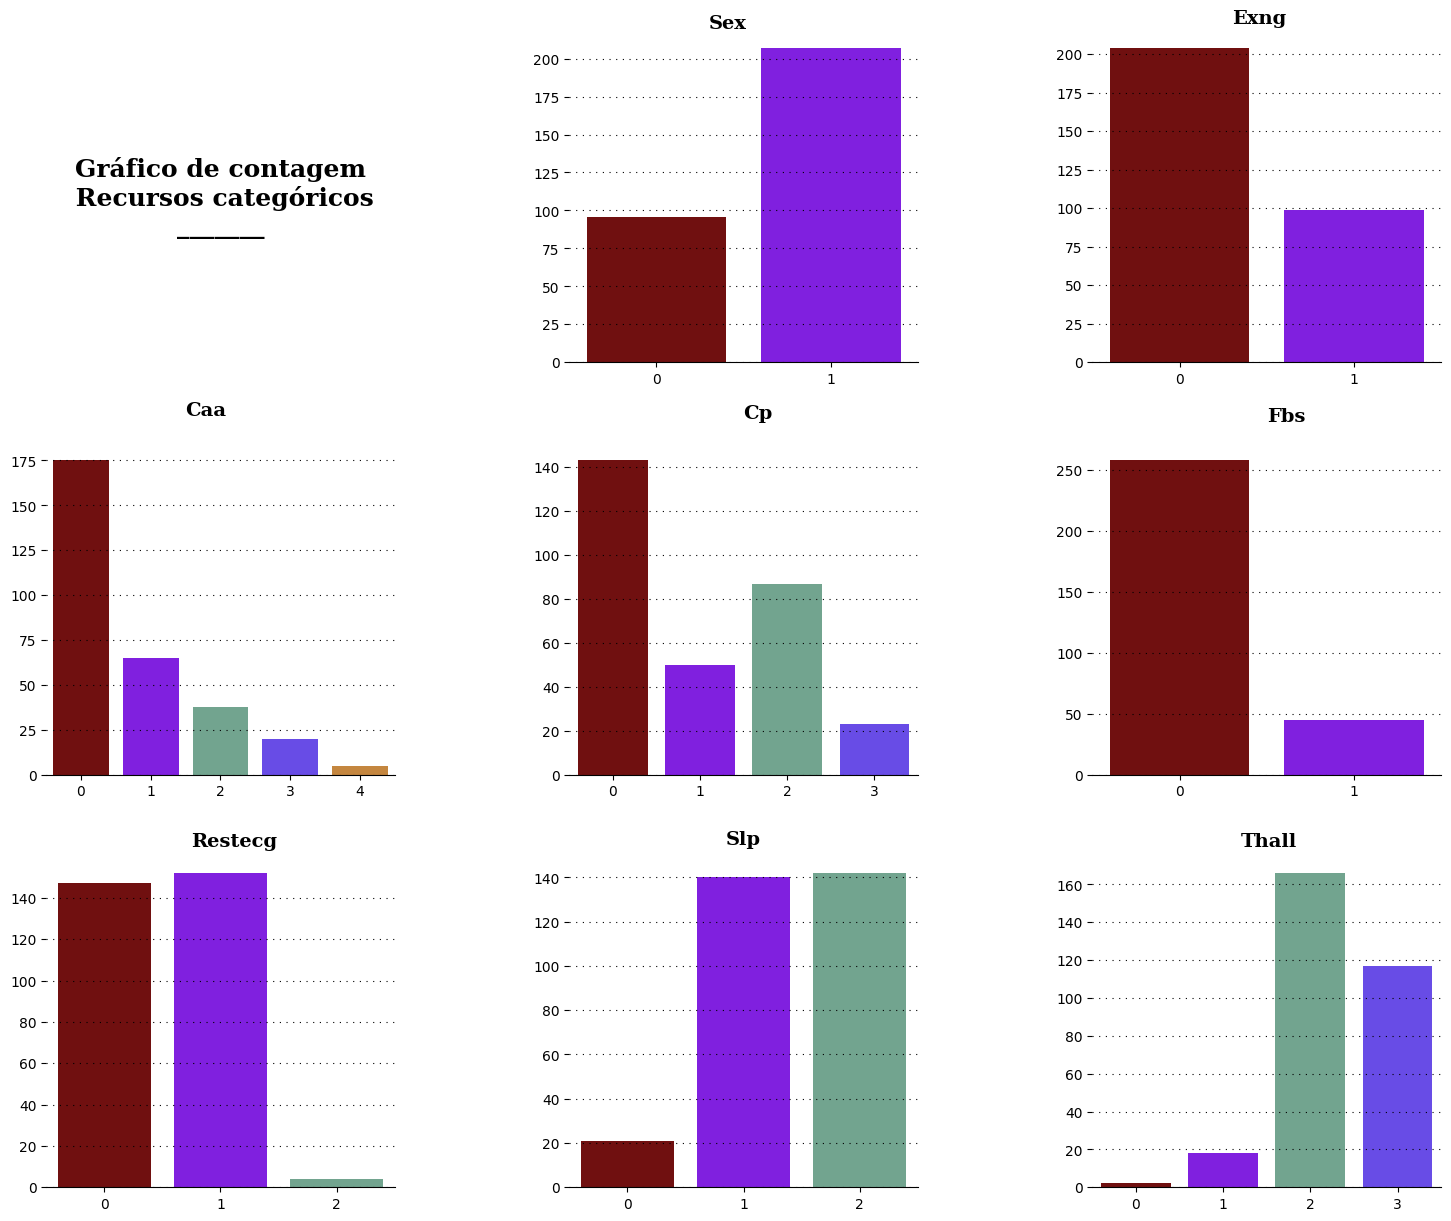

In [11]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Gráfico de contagem\n Recursos categóricos\n_______',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

##### 2.1.2 Gráficos BoxPlot de recursos contínuos

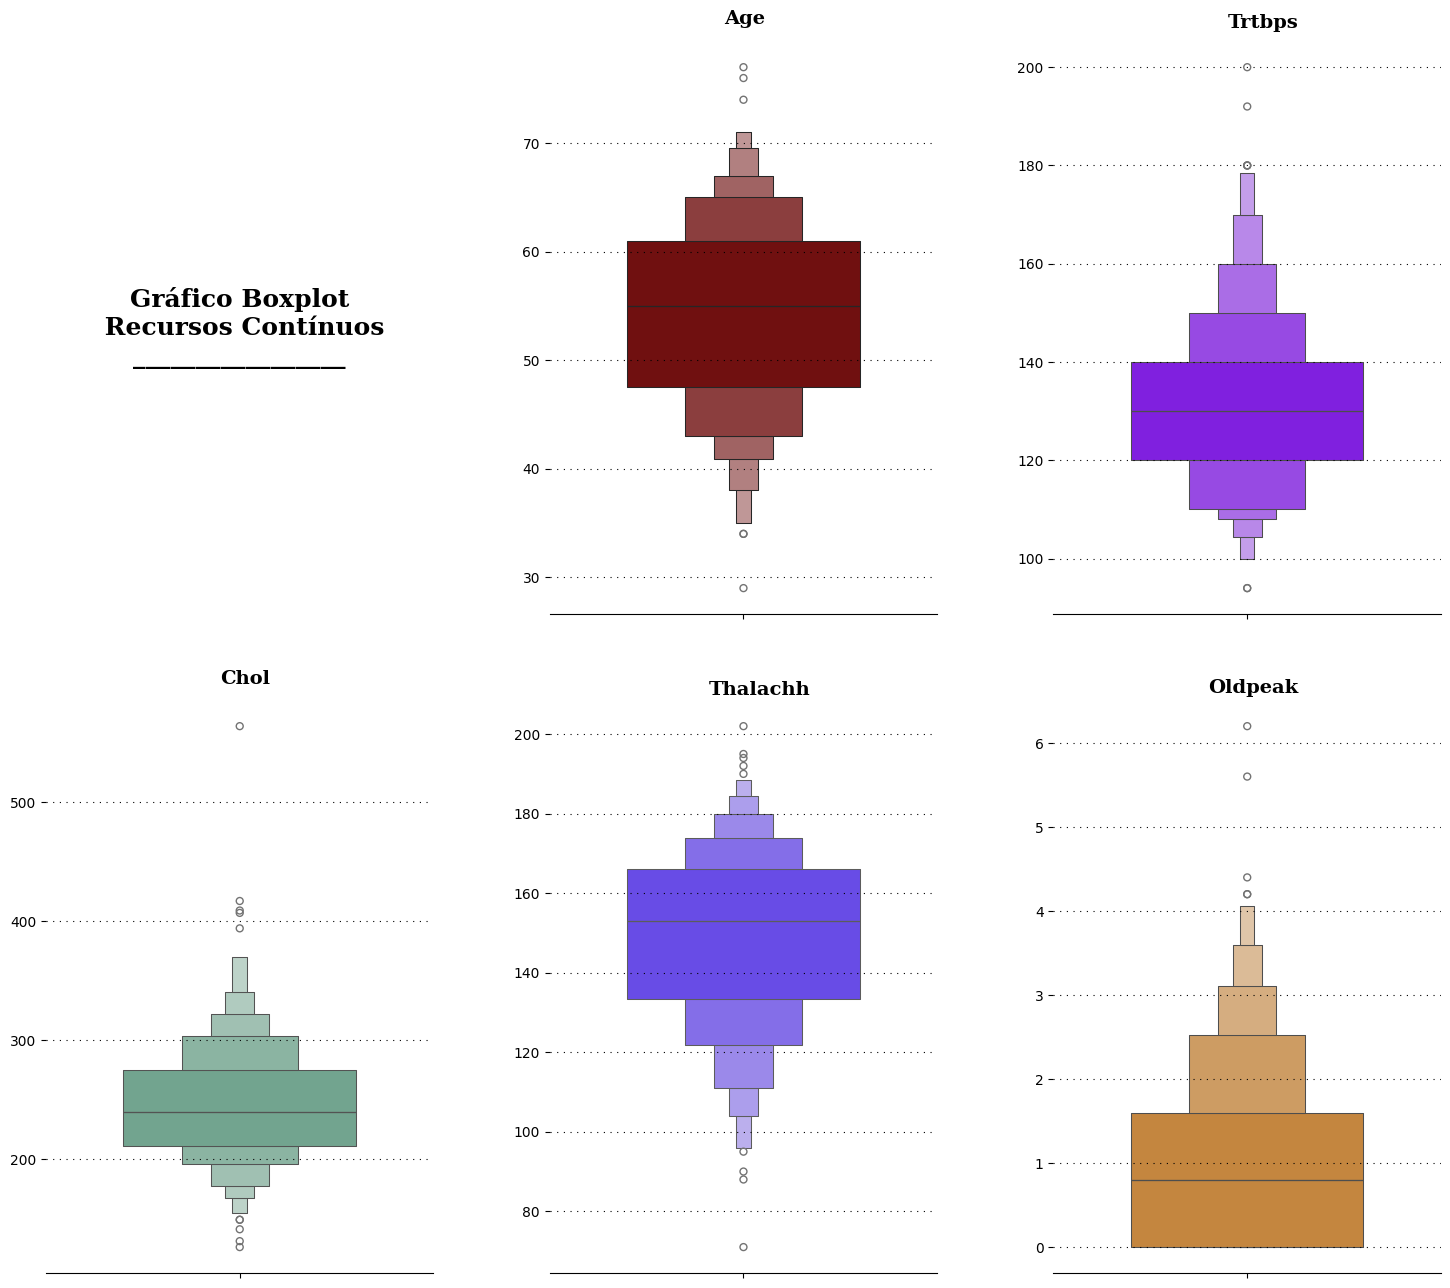

In [12]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Gráfico Boxplot\n Recursos Contínuos\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### 2.1.3 Gráfico de contagem de alvo

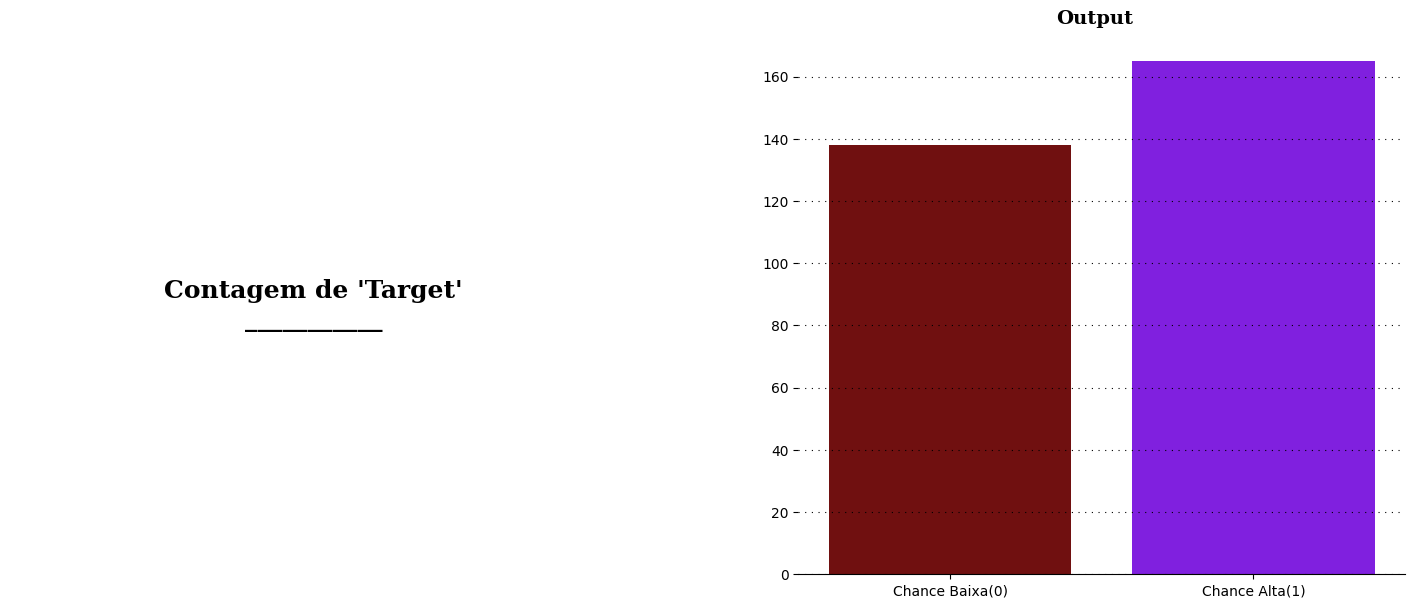

In [13]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Contagem de 'Target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Chance Baixa(0)","Chance Alta(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 2.2 Análise Bivariada <a id=8></a>

##### 2.2.1 Matriz de correlação de recursos contínuos

In [14]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


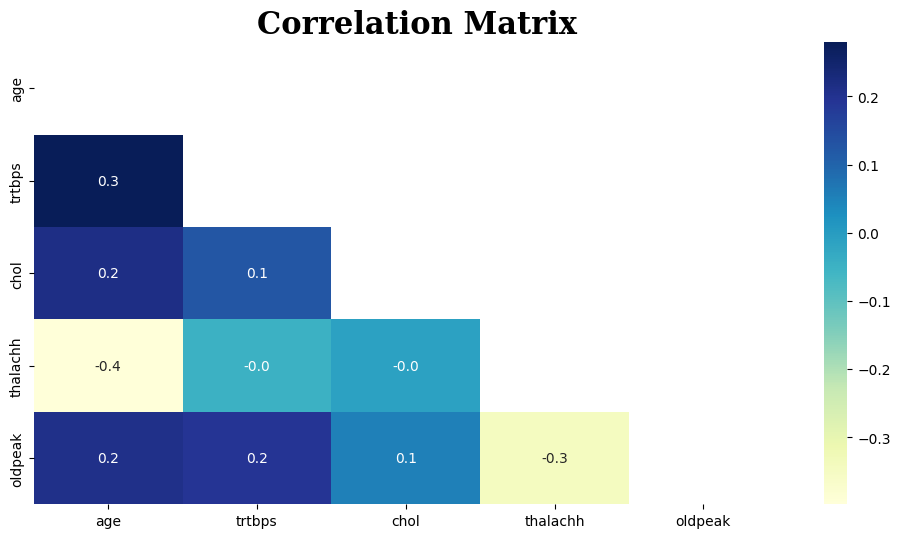

In [15]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

##### 2.2.2 Mapa de calor do gráfico de dispersão do dataframe

<Figure size 1200x1200 with 0 Axes>

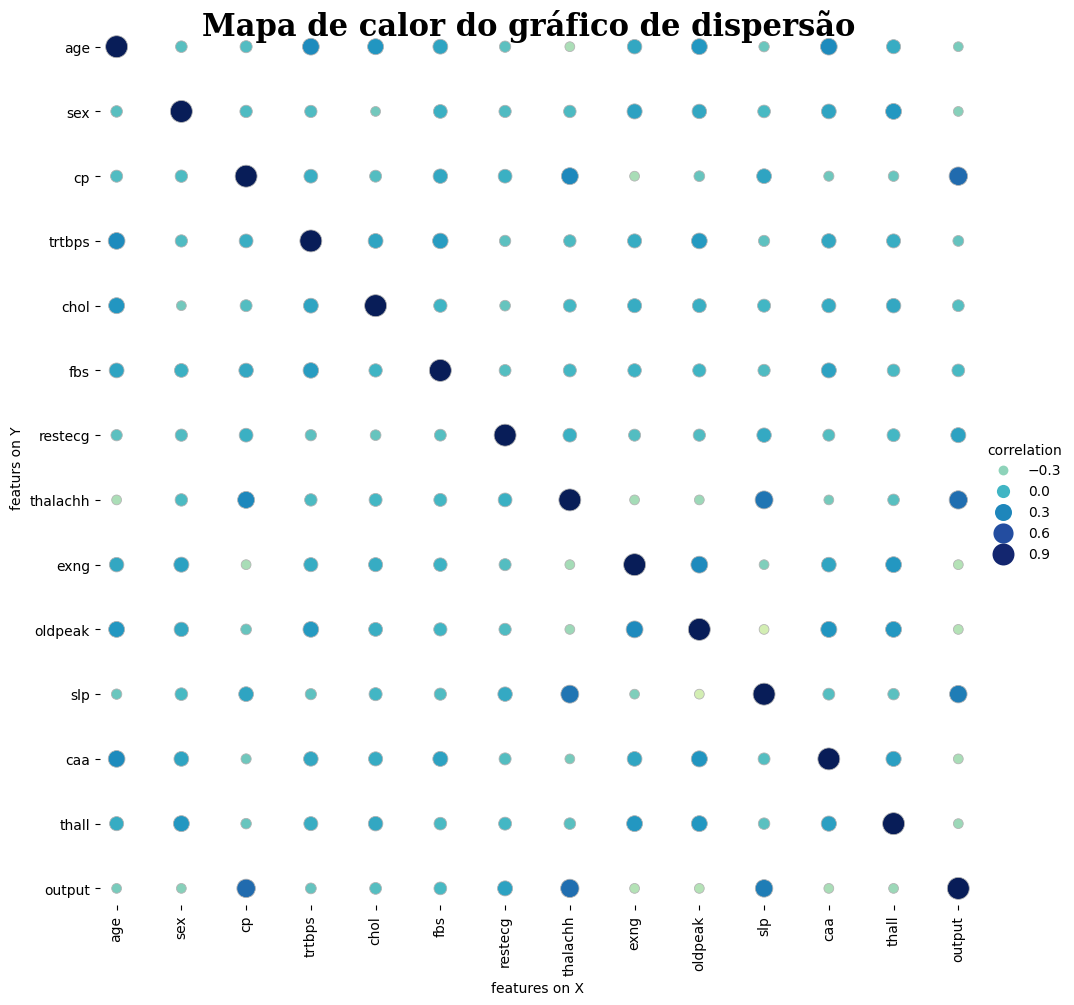

In [16]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Mapa de calor do gráfico de dispersão',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

##### 2.2.3 Distribuição de recursos contínuos de acordo com a variável alvo

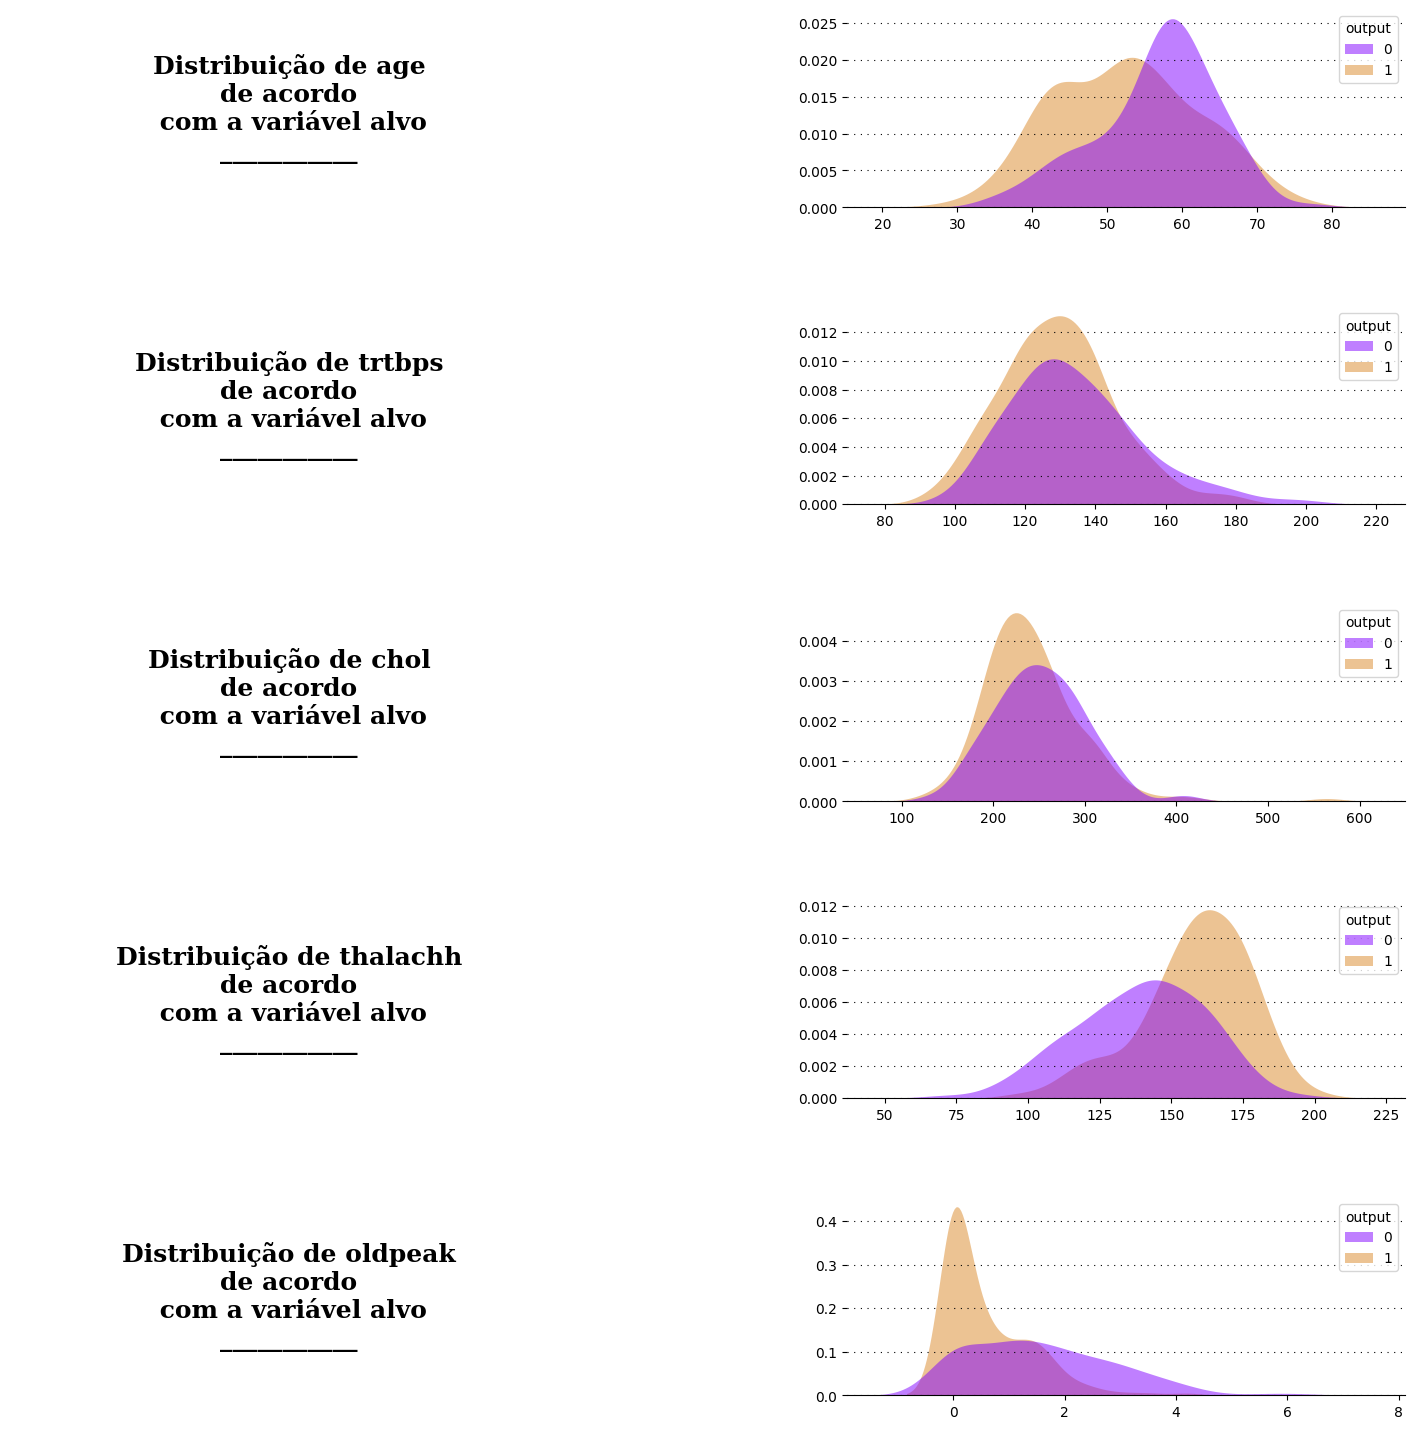

In [17]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribuição de age\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribuição de trtbps\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribuição de chol\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribuição de thalachh\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribuição de oldpeak\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

##### 2.2.4 Algumas outras relações que parecem intuitivas

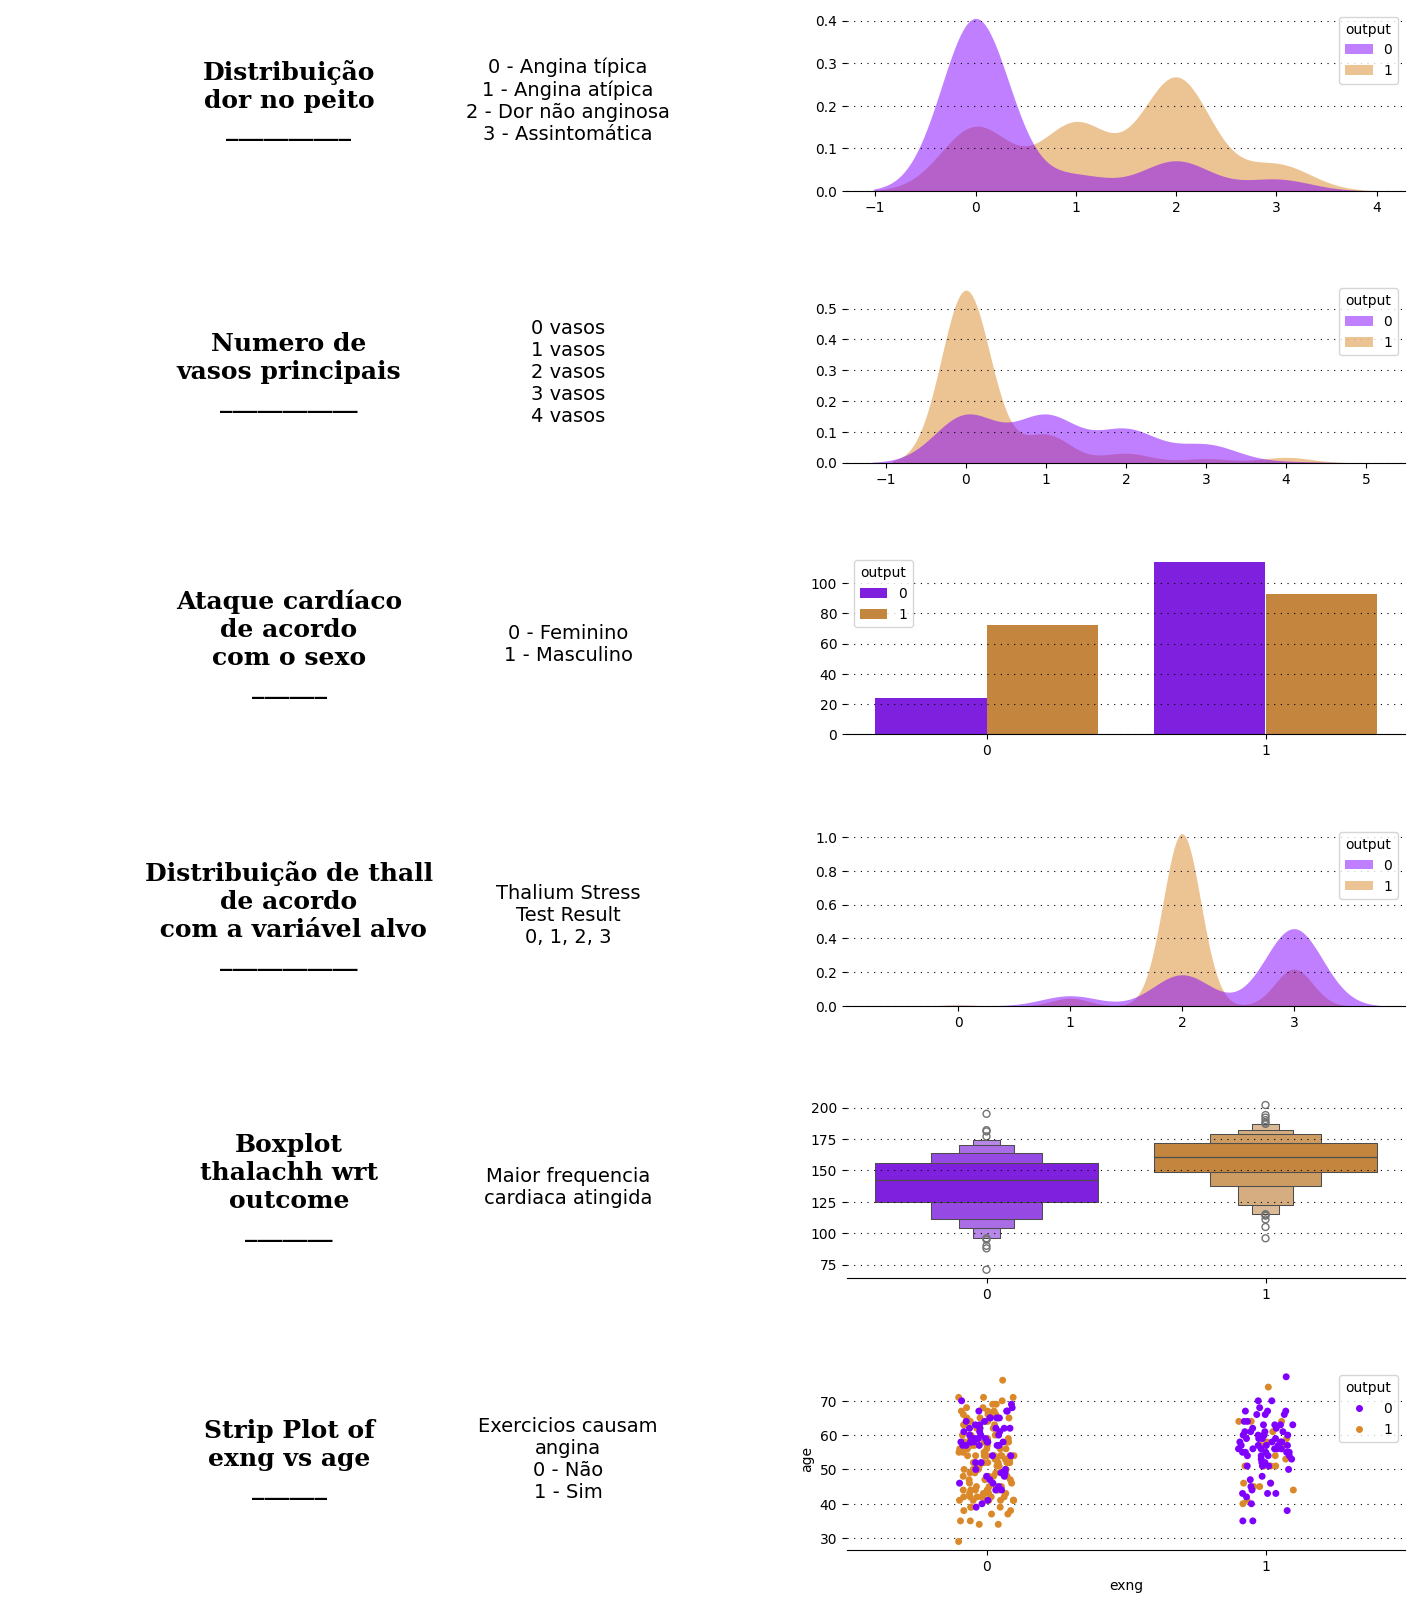

In [18]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Distribuição\ndor no peito\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Angina típica\n1 - Angina atípica\n2 - Dor não anginosa\n3 - Assintomática",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Numero de\nvasos principais\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vasos\n1 vasos\n2 vasos\n3 vasos\n4 vasos",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Ataque cardíaco\nde acordo\ncom o sexo\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Feminino\n1 - Masculino",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribuição de thall\nde acordo\n com a variável alvo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxplot\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maior frequencia\ncardiaca atingida",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercicios causam\nangina\n0 - Não\n1 - Sim",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

##### 2.2.5 Pairplot de acordo com a variável alvo - um gráfico para governar todos eles

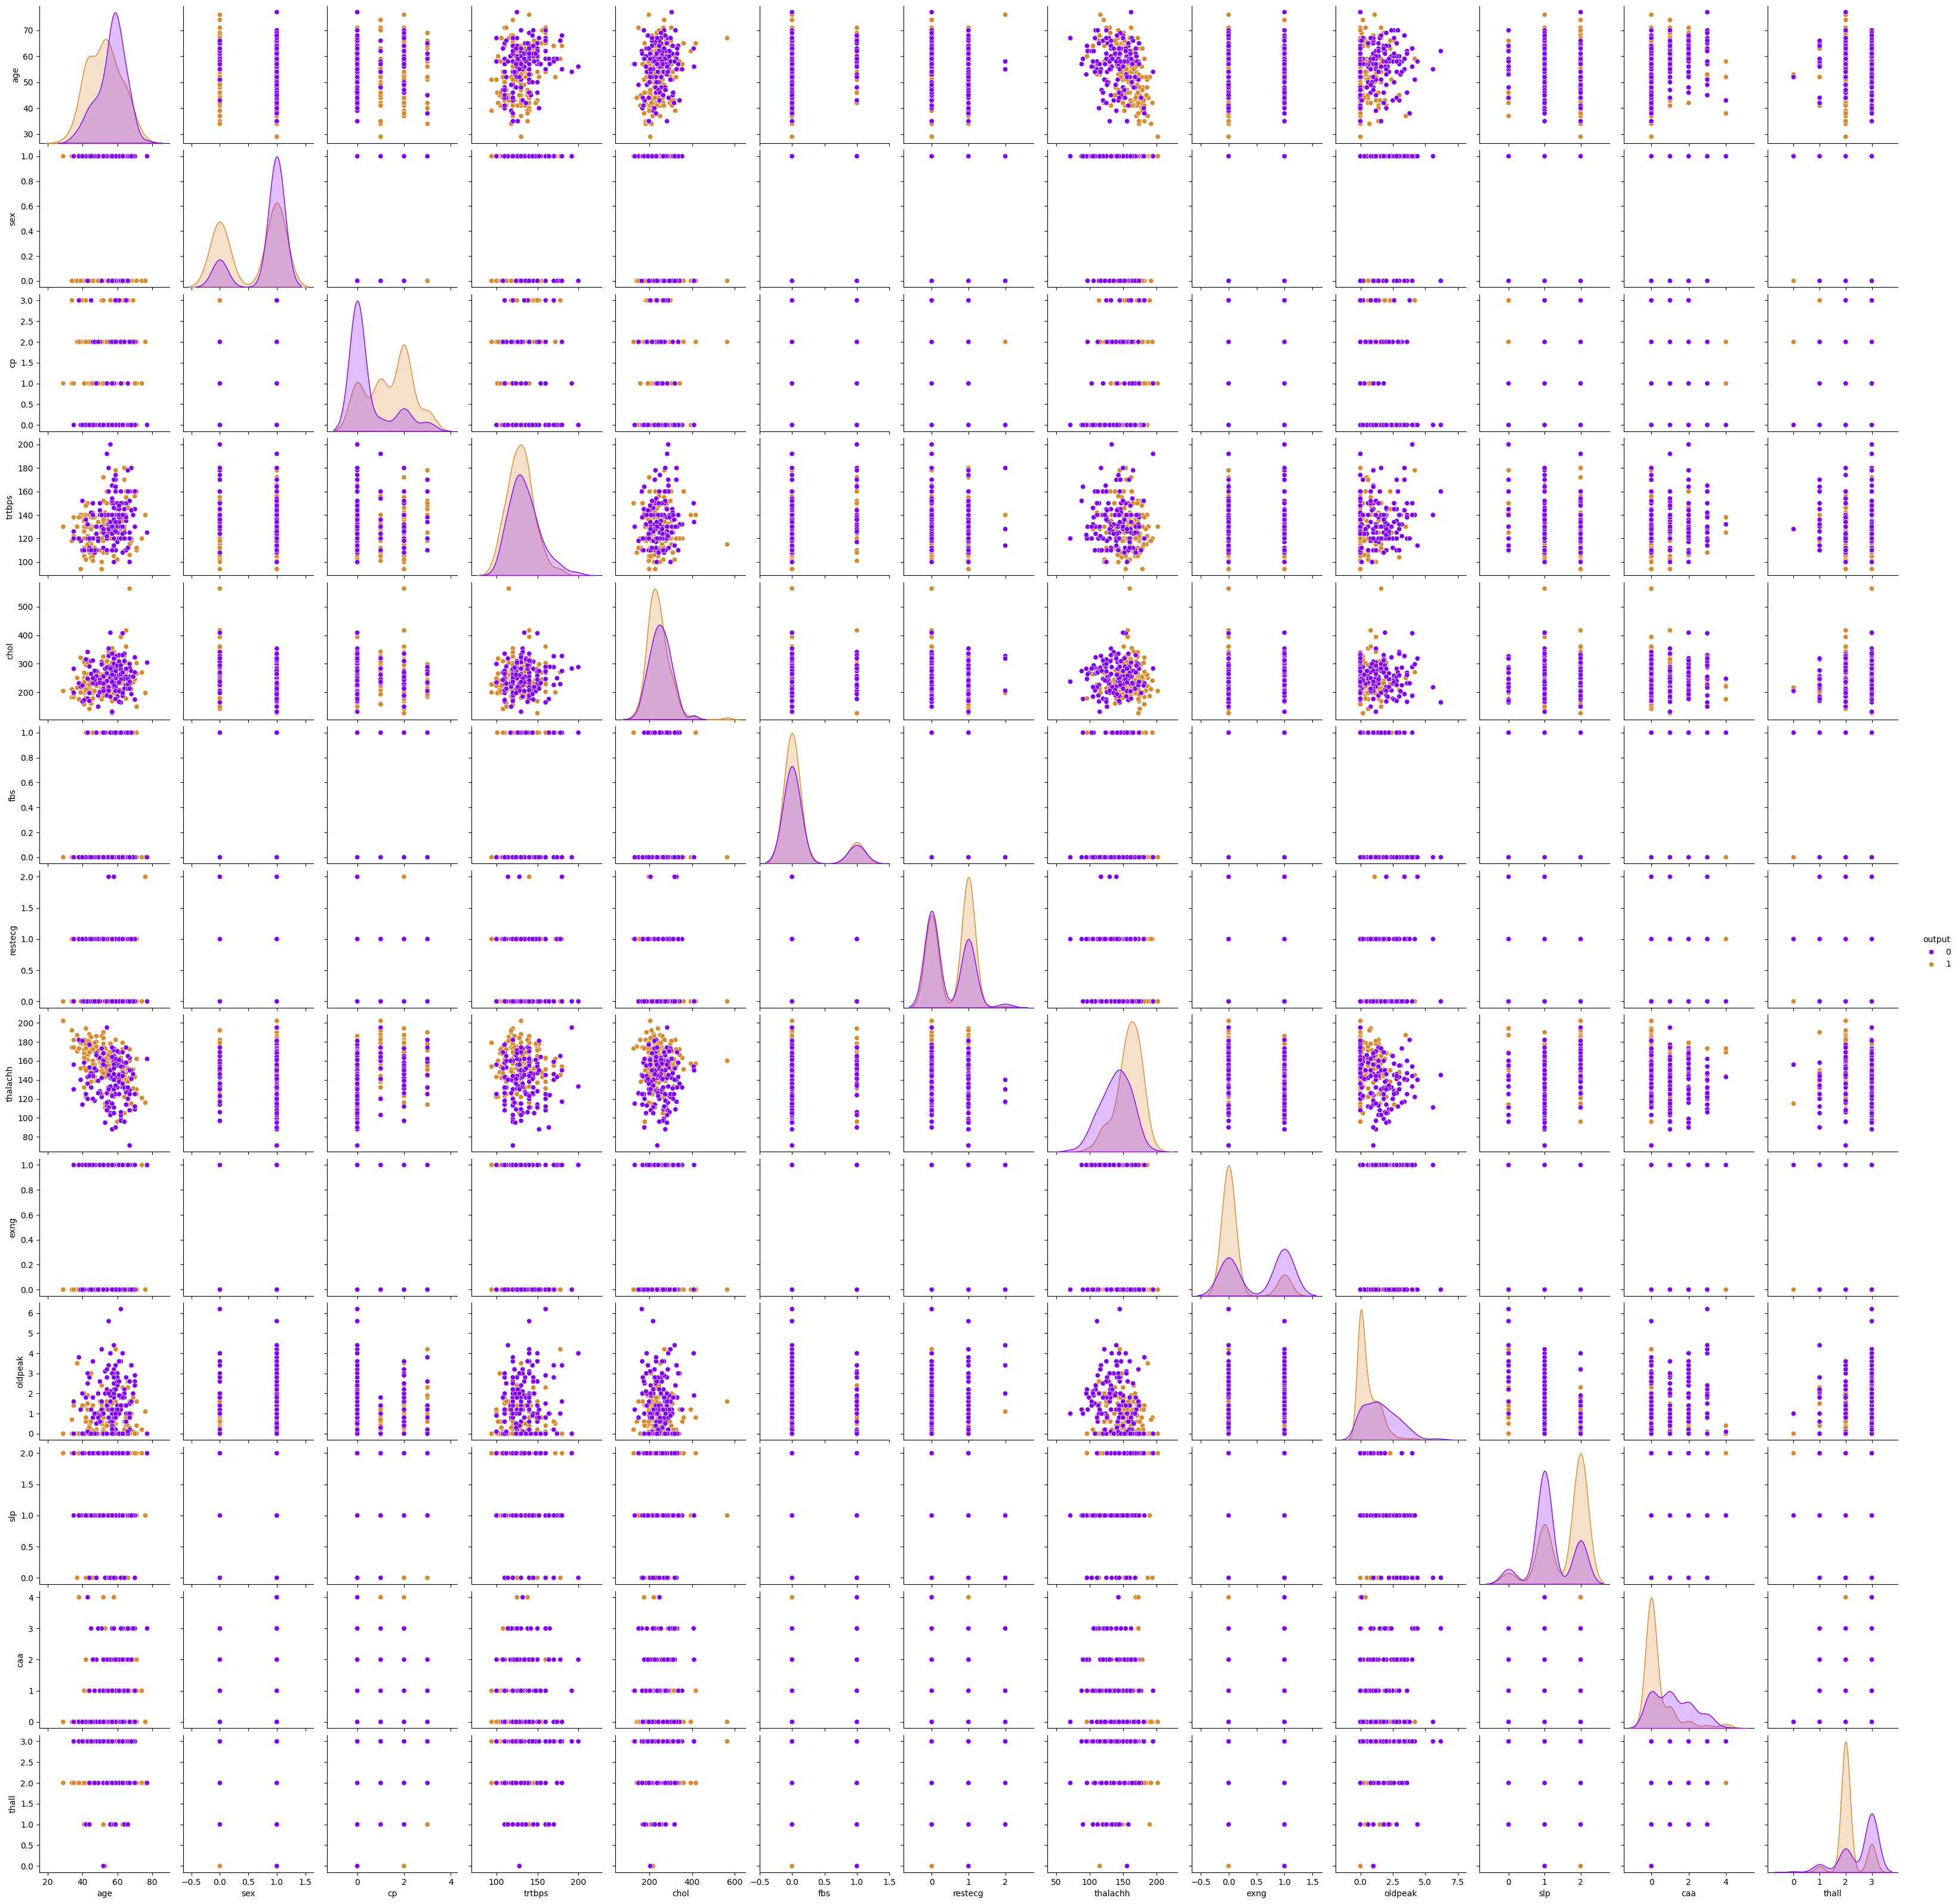

In [19]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

### 3. Pré-processamento de Dados <a id=11></a>
[back to top](#180)

#### 3.1 Conclusões da Análise Exploratória de Dados (EDA) <a id=12></a>

1. Não há valores NaN nos dados.
2. Existem alguns outliers em todas as variáveis contínuas.
3. Os dados consistem em mais que o dobro de pessoas com `sex` = 1 do que `sex` = 0.
4. Não há uma correlação linear aparente entre variáveis contínuas de acordo com o mapa de calor.
5. A matriz de scatterplot heatmap sugere que pode haver alguma correlação entre `output` e `cp`, `thalachh` e `slp`.
6. É intuitivo que pessoas mais velhas possam ter maiores chances de ataque cardíaco, mas de acordo com o gráfico de distribuição de `age` em relação a `output`, fica evidente que este não é o caso.
7. De acordo com o gráfico de distribuição de `thalachh` em relação a `output`, pessoas com maior frequência cardíaca máxima alcançada têm maiores chances de ataque cardíaco.
8. De acordo com o gráfico de distribuição de `oldpeak` em relação a `output`, pessoas com pico anterior mais baixo têm maiores chances de ataque cardíaco.
9. O gráfico *2.2.4* destaca o seguinte -
    - Pessoas com dor no peito não anginosa, ou seja, com `cp` = 2 têm maiores chances de ataque cardíaco.
    - Pessoas com 0 vasos principais, ou seja, com `caa` = 0, têm alta chance de ataque cardíaco.
    - Pessoas com `sex` = 1 têm maior chance de ataque cardíaco.
    - Pessoas com `thall` = 2 têm chances muito maiores de ataque cardíaco.
    - Pessoas sem angina induzida por exercício, ou seja, com `exng` = 0, têm maior chance de ataque cardíaco.

#### 3.2 Instalando pacotes <a id=13></a>

##### 3.2.1 Escalando e Codificando caracteristicas

In [20]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Pacotes importados...')

Pacotes importados...


#### 3.3 Configurando Caracteristicas para modelo <a id=14></a>

In [21]:
# Criando uma cópia do dataframe
df1 = df

# Definir as colunas para ser Codificada e Escalada
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Codificar as colunas categóricas
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# Definindo as caracteristicas e o alvo
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# Instanciando o Scaler
scaler = RobustScaler()

# Escalando as caracteristicas contínuas
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


##### 3.3.2 Train e Test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


### 4. Modelagem <a id=15></a>
[back to top](#180)

#### 4.1 Classificadores Lineares <a id=16></a>

##### 4.1.1 Support Vector Machines (SVM)

In [23]:
# Instanciando o objeto e fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# Predizendo os valores
y_pred = clf.predict(X_test)

svm_accuracy = f"SVM accuracy: {accuracy_score(y_test, y_pred)}"
# Teste de acurácia
print(svm_accuracy)

SVM accuracy: 0.8688524590163934


##### 4.1.2 Hyperparameter tuning of SVC

In [24]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

svm_tuning_accuracy = f"SVM after hyper-parameter tuning: {accuracy_score(y_test, y_pred)}"

# printing the test accuracy
print(svm_tuning_accuracy)

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
SVM after hyper-parameter tuning: 0.9016393442622951


##### 4.1.3 Logistic Regression

In [25]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)
logistic_regression_accuracy = f"Logistic Regression: {accuracy_score(y_test, y_pred)}"
# printing the test accuracy
print(logistic_regression_accuracy)

Logistic Regression: 0.9016393442622951


##### 4.1.4 Curva ROC

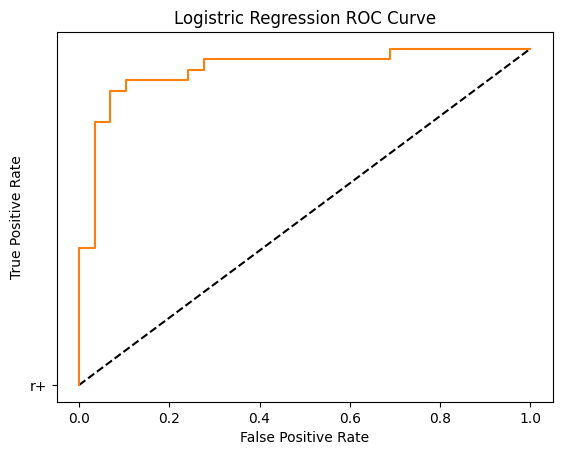

In [26]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

#### 4.2 Modelos de Arvore <a id=17></a>

##### 4.2.1 Decision Tree

In [27]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

decision_tree_accuracy = f"Decision Tree: {accuracy_score(y_test, y_pred)}"
# printing the test accuracy
print(decision_tree_accuracy)

Decision Tree: 0.7868852459016393


##### 4.2.2 Random Forest

In [28]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

random_forest_accuracy = f"Random Forest: {accuracy_score(y_test, y_pred)}"

# printing the test accuracy
print(random_forest_accuracy)

Random Forest: 0.7868852459016393


##### 4.2.3 Gradient Boosting Classifier - without tuning

In [29]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

gbc_accuracy = f"Gradient Boosting Classifier: {accuracy_score(y_test, y_pred)}"

# predicting values
y_pred = gbt.predict(X_test)
print(gbc_accuracy)

Gradient Boosting Classifier: 0.7868852459016393


### 5 Resultados <a id=18></a>
[back to top](#180)

#### 5.1 Acurácia dos Modelos <a id=19></a>

In [30]:
print("Classificadores Lineares:")

print(f"- {svm_accuracy}")
print(f"- {svm_tuning_accuracy}")
print(f"- {logistic_regression_accuracy}")

print("Arvores de Descisão")

print(f"- {decision_tree_accuracy}")
print(f"- {random_forest_accuracy}")
print(f"- {gbc_accuracy}")

Classificadores Lineares:
- SVM accuracy: 0.8688524590163934
- SVM after hyper-parameter tuning: 0.9016393442622951
- Logistic Regression: 0.9016393442622951
Arvores de Descisão
- Decision Tree: 0.7868852459016393
- Random Forest: 0.7868852459016393
- Gradient Boosting Classifier: 0.7868852459016393
